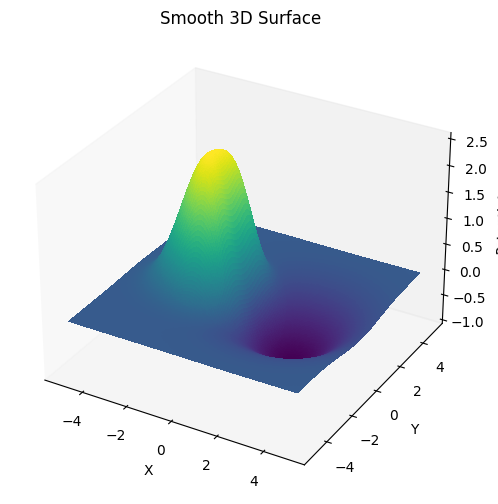

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 生成更密集的网格（关键：增加采样点数量）
x = np.linspace(-5, 5, 200)  # 从100增加到200，提升横向精度
y = np.linspace(-5, 5, 200)  # 从100增加到200，提升纵向精度
X, Y = np.meshgrid(x, y)

# 2. 定义势场函数（保持不变）
def potential_field(x, y):
    target = np.exp(-((x - 2)**2 + (y - 0)** 2) / 5)  
    obstacle1 = 2 * np.exp(-((x + 2)**2 + (y - 0)** 2) / 2)  
    obstacle2 = 1.5 * np.exp(-((x + 1)**2 + (y + 1)** 2) / 1) + 1.5 * np.exp(-((x + 1)**2 + (y - 1)** 2) / 1)  
    return  -target + obstacle1 + obstacle2  

Z = potential_field(X, Y)

# 3. 绘制三维曲面（优化渲染参数）
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 关键参数组合：提升光滑度
surf = ax.plot_surface(
    X, Y, Z,
    cmap='viridis',
    alpha=1,
    linewidth=0,          # 去除表面网格线
    antialiased=False,     # 启用抗锯齿（让边缘更平滑）
    rstride=1,            # 行步长=1（使用所有行数据）
    cstride=1             # 列步长=1（使用所有列数据）
)

# 4. 去除坐标轴网格
ax.grid(False)

# 5. 其他设置
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
ax.set_title('Smooth 3D Surface')

plt.show()
    

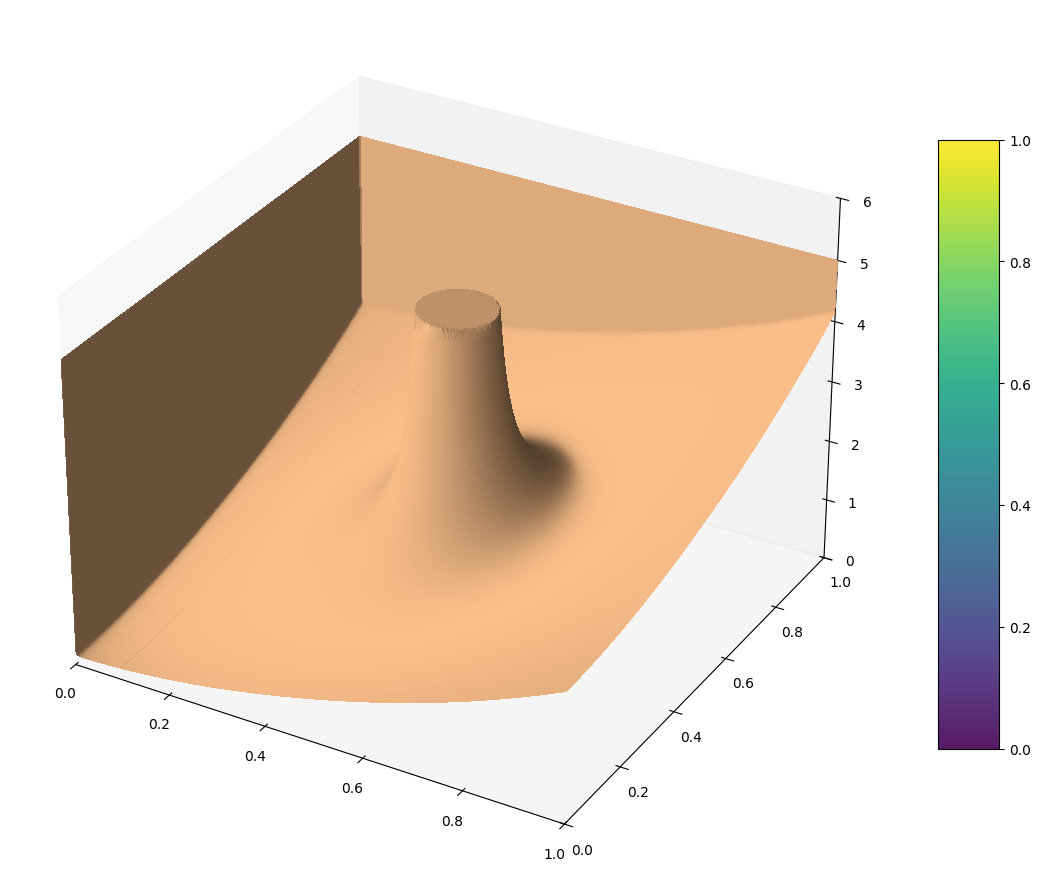

max: 5.000000
x=0.1 chili: 0.005000
y=0.9 chili: 0.005000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math



# 1. 生成工作空间网格 (0到1范围)
x = np.linspace(0, 1, 500)  # X轴范围：0到1
y = np.linspace(0, 1, 500)  # Y轴范围：0到1
X, Y = np.meshgrid(x, y)

# 2. 定义函数：基础势场 + 指定边界斥力（限制最大值不超过2）
def potential_function(x, y):
    # 基础势场 z = x² + y²
    base =2*( x**2 + y**2)
    
    # 边界斥力 - 仅在x=0和y=1添加斥力
    epsilon = 1e-8  # 避免除零错误
    
    # 计算指定边界的距离
    dist_x0 = x  # 到x=0边界的距离
    dist_y1 = 1 - y  # 到y=1边界的距离
    
    # 计算斥力（调整系数使0.1范围内斥力≤0.005）
    # 系数=0.0005，在距离=0.1处斥力=0.0005/0.1=0.005，满足要求
    repel_x0 = 0.0001 / (dist_x0 + epsilon) if dist_x0 < 0.1 else 0
    repel_y1 = 0.0001 / (dist_y1 + epsilon) if dist_y1 < 0.1 else 0

    dist_r=math.sqrt((x-0.5)**2+(y-0.5)**2)
    repel_r=5 if dist_r<0.05 else 0
    repel_r1=0.1/(dist_r-0.05+epsilon) if dist_r>=0.05 else 0

    # 总斥力（仅x=0和y=1的斥力）
    total_repel = repel_x0 + repel_y1 + repel_r + repel_r1
    
    # 总势场（确保不超过2）
    total = base + total_repel
    return min(total, 5.0)

# 向量化函数以提高计算效率
vec_potential = np.vectorize(potential_function)

# 3. 计算势场值
Z = vec_potential(X, Y)

# 4. 绘制三维曲面
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制光滑曲面，使用肉色(#FFDAB9)渲染
surf = ax.plot_surface(
    X, Y, Z,
    color="#FBBF8A",  # 肉色的十六进制颜色码
    alpha=0.9,        # 透明度设置
    linewidth=0,
    antialiased=False,
    rstride=1,
    cstride=1
)

# 添加颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)

# 去除坐标轴网格
ax.grid(False)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 6)  # 严格限制z轴最大值为2

plt.tight_layout()
plt.show()

# 打印验证：检查最大值是否在2以内
print(f"max: {np.max(Z):.6f}")
# 验证0.1处的斥力值
print(f"x=0.1 chili: {0.0005/0.1:.6f}")
print(f"y=0.9 chili: {0.0005/0.1:.6f}")
    
    
    

    

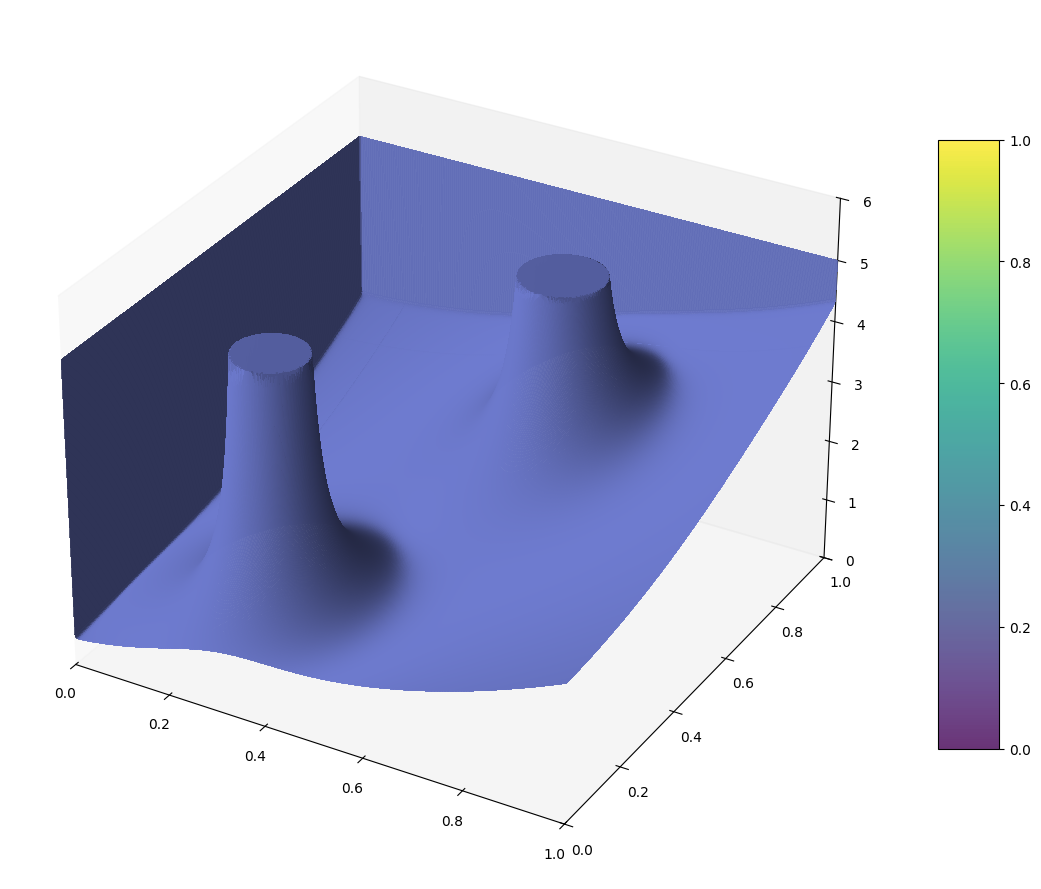

max: 5.000000
x=0.1 chili: 0.005000
y=0.9 chili: 0.005000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math



# 1. 生成工作空间网格 (0到1范围)
x = np.linspace(0, 1, 700)  # X轴范围：0到1
y = np.linspace(0, 1, 700)  # Y轴范围：0到1
X, Y = np.meshgrid(x, y)

# 2. 定义函数：基础势场 + 指定边界斥力（限制最大值不超过2）
def potential_function(x, y):
    # 基础势场 z = x² + y²
    base =2*( x**2 + y**2)
    
    # 边界斥力 - 仅在x=0和y=1添加斥力
    epsilon = 1e-8  # 避免除零错误
    
    # 计算指定边界的距离
    dist_x0 = x  # 到x=0边界的距离
    dist_y1 = 1 - y  # 到y=1边界的距离
    
    # 计算斥力（调整系数使0.1范围内斥力≤0.005）
    # 系数=0.0005，在距离=0.1处斥力=0.0005/0.1=0.005，满足要求
    repel_x0 = 0.0001 / (dist_x0 + epsilon) if dist_x0 < 0.1 else 0
    repel_y1 = 0.0001 / (dist_y1 + epsilon) if dist_y1 < 0.1 else 0

    dist_r=math.sqrt((x-0.3)**2+(y-0.2)**2)
    repel_r=5 if dist_r<0.05 else 0
    repel_r1=0.1/(dist_r-0.05+epsilon) if dist_r>=0.05 else 0

    dist_r1=math.sqrt((x-0.6)**2+(y-0.7)**2)
    repel_r2=5 if dist_r1<0.05 else 0
    repel_r3=0.1/(dist_r1-0.05+epsilon) if dist_r1>=0.05 else 0

    # 总斥力（仅x=0和y=1的斥力）
    total_repel = repel_x0 + repel_y1 + repel_r + repel_r1 + repel_r2 + repel_r3
    
    # 总势场（确保不超过2）
    total = base + total_repel
    return min(total, 5.0)

# 向量化函数以提高计算效率
vec_potential = np.vectorize(potential_function)

# 3. 计算势场值
Z = vec_potential(X, Y)

# 4. 绘制三维曲面
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制光滑曲面，使用肉色(#FFDAB9)渲染
surf = ax.plot_surface(
    X, Y, Z,
    color="#6E7BCF",  # 肉色的十六进制颜色码
    alpha=0.8,        # 透明度设置
    linewidth=0,
    antialiased=False,
    rstride=1,
    cstride=1
)

# 添加颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)

# 去除坐标轴网格
ax.grid(False)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 6)  # 严格限制z轴最大值为2

plt.tight_layout()
plt.show()

# 打印验证：检查最大值是否在2以内
print(f"max: {np.max(Z):.6f}")
# 验证0.1处的斥力值
print(f"x=0.1 chili: {0.0005/0.1:.6f}")
print(f"y=0.9 chili: {0.0005/0.1:.6f}")
    
    
    

    

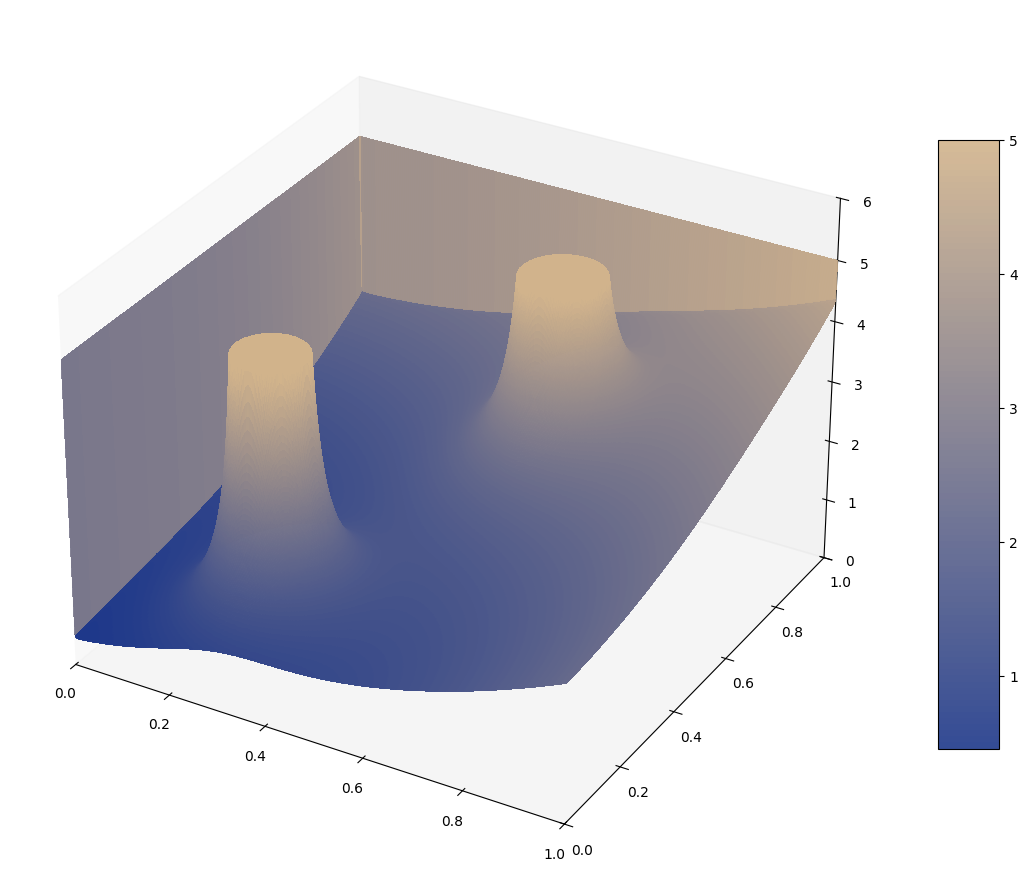

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.colors import LinearSegmentedColormap

# 1. 生成自定义颜色映射：从深蓝色到土黄色
# 深蓝色: #1E3A8A (RGB: 0.1176, 0.2196, 0.5412)
# 土黄色: #D2B48C (RGB: 0.8235, 0.7059, 0.5490)
colors = [(0.1176, 0.2196, 0.5412), (0.8235, 0.7059, 0.5490)]  # RGB值
n_bins = 100  # 颜色过渡的步数
custom_cmap = LinearSegmentedColormap.from_list('blue_to_earth', colors, N=n_bins)

# 2. 生成工作空间网格 (0到1范围)
x = np.linspace(0, 1, 700)  # X轴范围：0到1
y = np.linspace(0, 1, 700)  # Y轴范围：0到1
X, Y = np.meshgrid(x, y)

# 3. 定义函数：基础势场 + 指定边界斥力（限制最大值不超过5）
def potential_function(x, y):
    # 基础势场 z = x² + y²
    base = 2 * (x**2 + y**2)
    
    # 边界斥力 - 仅在x=0和y=1添加斥力
    epsilon = 1e-8  # 避免除零错误
    
    # 计算指定边界的距离
    dist_x0 = x  # 到x=0边界的距离
    dist_y1 = 1 - y  # 到y=1边界的距离
    
    # 计算斥力（调整系数使0.1范围内斥力≤0.005）
    repel_x0 = 0.0001 / (dist_x0 + epsilon) if dist_x0 < 0.1 else 0
    repel_y1 = 0.0001 / (dist_y1 + epsilon) if dist_y1 < 0.1 else 0

    dist_r = math.sqrt((x-0.3)**2 + (y-0.2)** 2)
    repel_r = 5 if dist_r < 0.05 else 0
    repel_r1 = 0.1 / (dist_r - 0.05 + epsilon) if dist_r >= 0.05 else 0

    dist_r1 = math.sqrt((x-0.6)**2 + (y-0.7)** 2)
    repel_r2 = 5 if dist_r1 < 0.05 else 0
    repel_r3 = 0.1 / (dist_r1 - 0.05 + epsilon) if dist_r1 >= 0.05 else 0

    # 总斥力
    total_repel = repel_x0 + repel_y1 + repel_r + repel_r1 + repel_r2 + repel_r3
    
    # 总势场（确保不超过5）
    total = base + total_repel
    return min(total, 5.0)

# 向量化函数以提高计算效率
vec_potential = np.vectorize(potential_function)

# 4. 计算势场值
Z = vec_potential(X, Y)

# 5. 绘制三维曲面
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制光滑曲面，使用自定义颜色映射
surf = ax.plot_surface(
    X, Y, Z,
    cmap=custom_cmap,  # 使用自定义的颜色映射
    alpha=0.9,         # 透明度设置
    linewidth=0,
    antialiased=False,
    rstride=1,
    cstride=1
)

# 添加颜色条
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=10)

# 去除坐标轴网格
ax.grid(False)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 6)  # 限制z轴最大值为6

plt.tight_layout()
plt.show()


    
